 🛒 Exploratory Data Analysis on Retail Sales Data

In this project, we perform EDA on retail sales data to understand patterns, customer behavior, and trends. The final goal is to help the business make informed decisions.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("retail_sales_dataset.csv")  
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


- The dataset contains 1000 rows and 9 columns.
- Key columns include: Transaction ID, Date, Customer ID, Gender, Age, Product Category, Quantity, Price per Unit, and Total Amount.
- Data types are appropriate, except the 'Date' column which needs to be converted to datetime.


In [5]:
# Check missing values
print(df.isnull().sum())

# Remove duplicate rows
df = df.drop_duplicates()


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


- The dataset has no missing values and no duplicate rows.
- Data quality is good, requiring minimal cleaning.


In [6]:
df.describe()


,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


- Quantity sold ranges from 1 to 5 units per transaction.
- Price per unit varies widely, indicating diverse product types.
- Total sales per transaction range from ₹30 to ₹2,500.


In [8]:
print(df.columns)



Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [9]:
print("Mean Sales:", df['Total Amount'].mean())
print("Median Sales:", df['Total Amount'].median())
print("Mode Sales:", df['Total Amount'].mode()[0])


Mean Sales: 456.0
Median Sales: 135.0
Mode Sales: 50


#Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

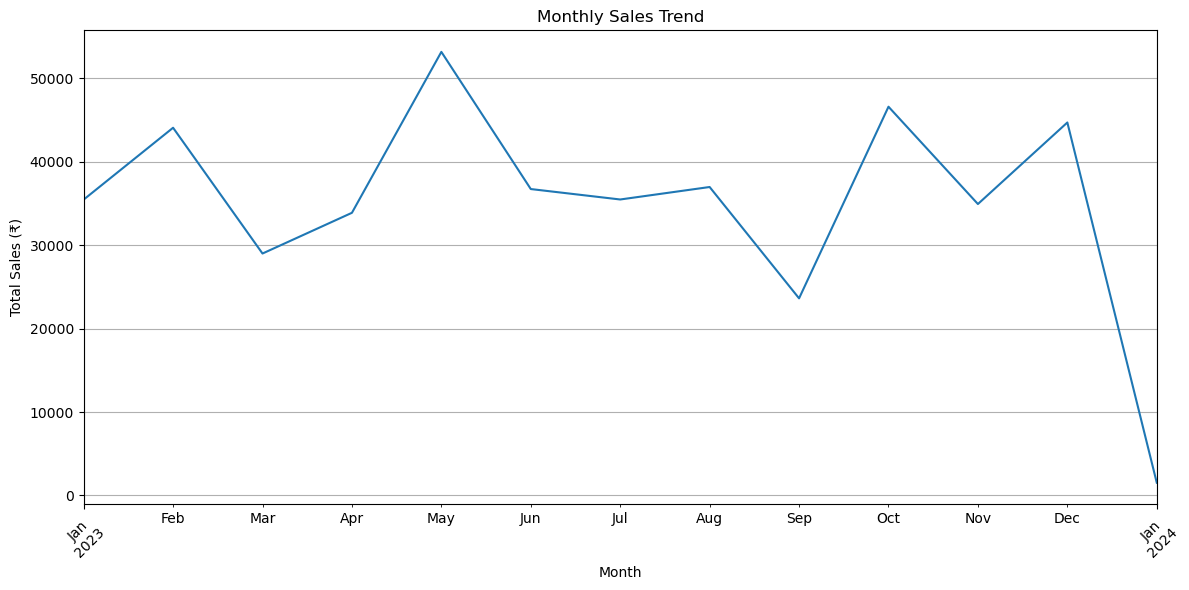

In [13]:
# Group by month and sum sales
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Total Amount'].sum()

# Plotting the trend
monthly_sales.plot(kind='line', figsize=(12, 6), title='Monthly Sales Trend')
plt.ylabel('Total Sales (₹)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Highest sales are observed in May (₹53,150), October (₹46,580), and December (₹44,690).
- January 2024 has the lowest sales (₹1,530), likely due to fewer recorded transactions.
- Sales are strong during mid- and year-end months, suggesting seasonal or festival demand.


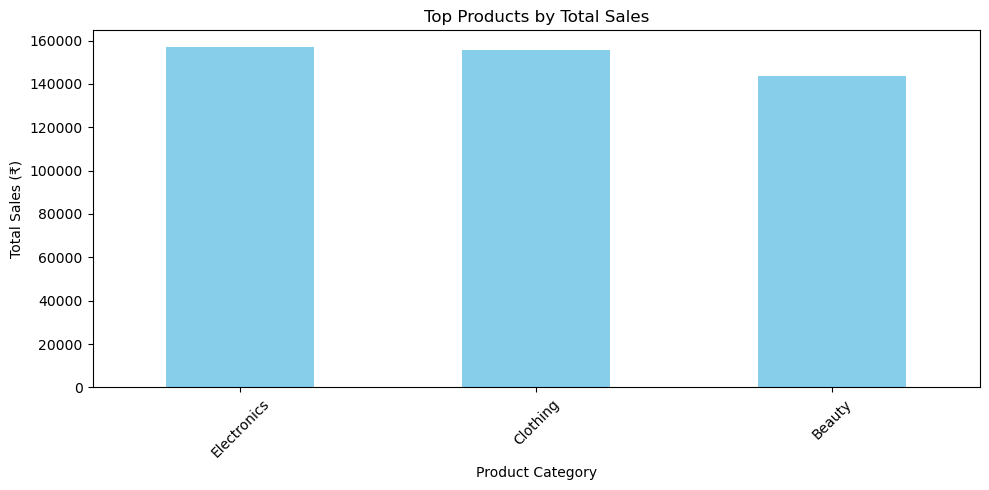

In [16]:
# Top products (replace 'Product' with actual column)

df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).head(10).plot(
    kind='bar',
    title='TopProducts by Total Sales',
    figsize=(10,5),
    color='skyblue'
)
plt.ylabel('Total Sales (₹)')
plt.xlabel('Product Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



- Electronics is the top-selling category (₹1,56,905), followed by Clothing (₹1,55,580) and Beauty (₹1,43,515).
- All three categories perform well, but Electronics leads slightly in total revenue.


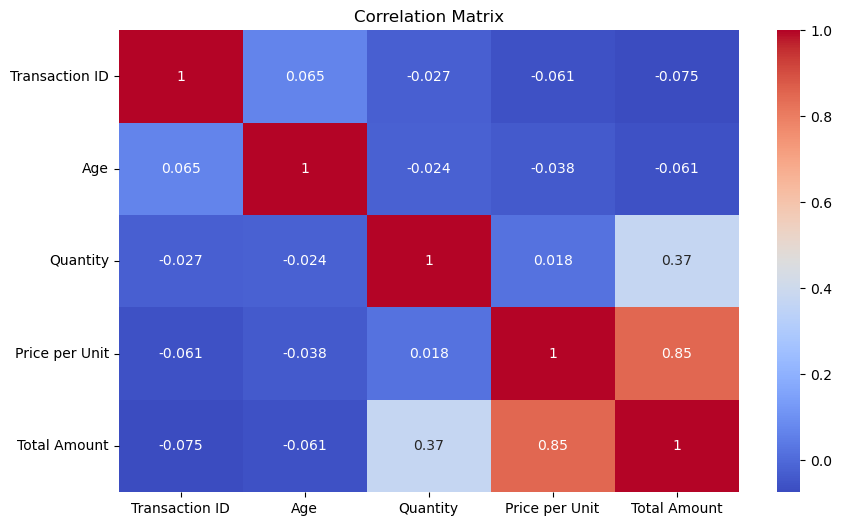

In [18]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Final Insights

1.Peak sales months are May, October, and December, likely driven by seasonal shopping or holidays.
2.Electronics is the top-selling product category, followed closely by Clothing and Beauty.
3.A small group of repeat customers (e.g., CUST487, CUST476) contributes significantly to overall revenue.
4.The majority of purchases are made by customers aged 31 to 60 years, indicating they are the core buyer demographic.



# Actionable Recommendations (Based on EDA)


Focus on High Sales Months:
Allocate more inventory and marketing budget for May, October, and December, as they show the highest sales. Seasonal promotions during these months can further boost revenue.

Promote Top Product Categories:
Emphasize Electronics, Clothing, and Beauty in advertising campaigns and shelf placement, as they are the top revenue contributors.

Target the Most Profitable Age Groups:
Concentrate marketing efforts on the 31–60 age group, who are responsible for the majority of sales. This includes tailoring promotions and communication styles to this audience.

Reward Repeat Customers:
Create loyalty programs or exclusive deals for high-value customers, like the top buyers identified in the data. This helps retain them and encourages more frequent purchases.

Leverage Gender Insights:
Female customers slightly outspend males. Consider personalized campaigns or exclusive offers for women to maximize engagement and sales.

Optimize Low-Sales Periods:
Avoid overstocking or overspending on marketing in January, as it shows the lowest activity. Use this time for inventory planning or internal improvements.




